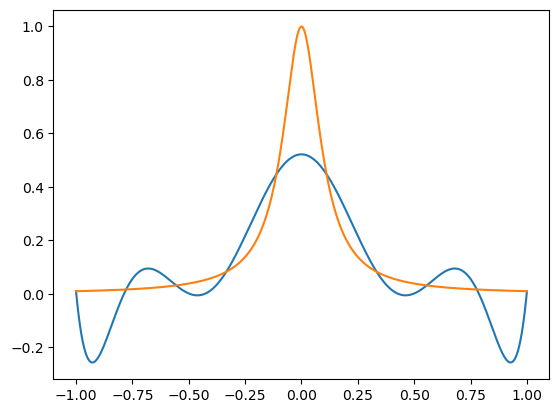

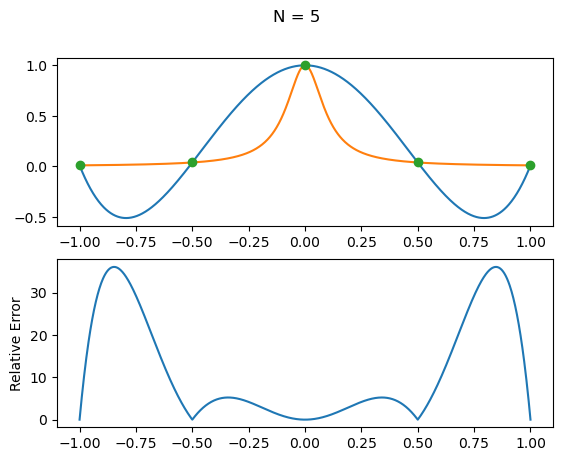

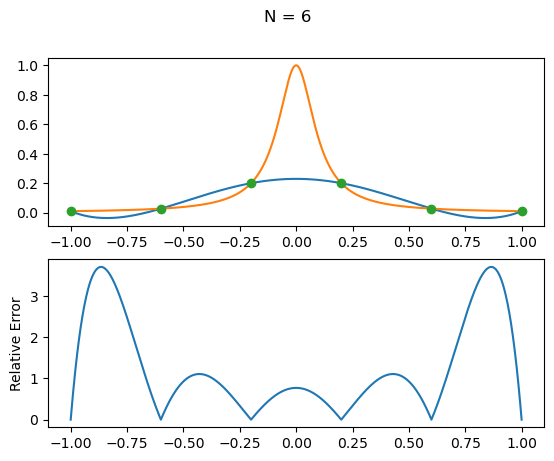

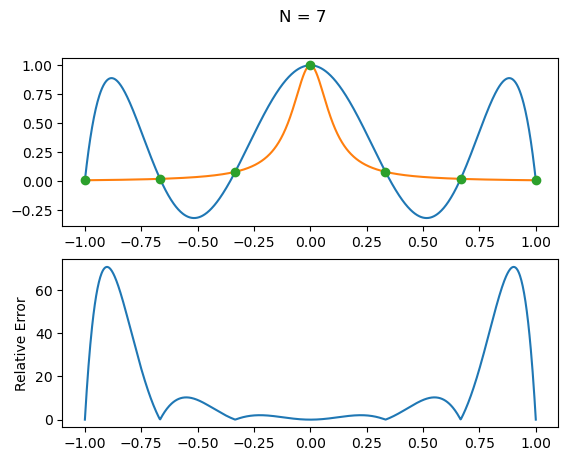

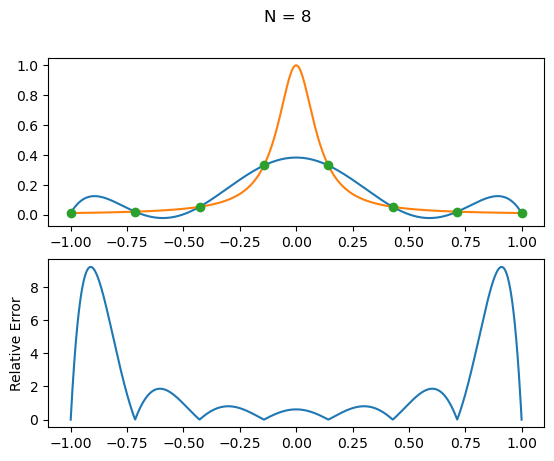

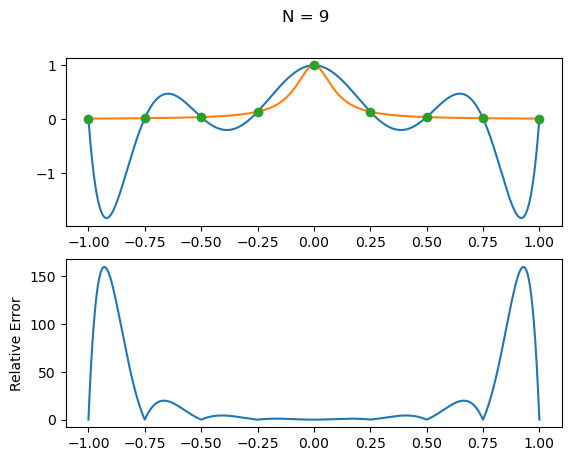

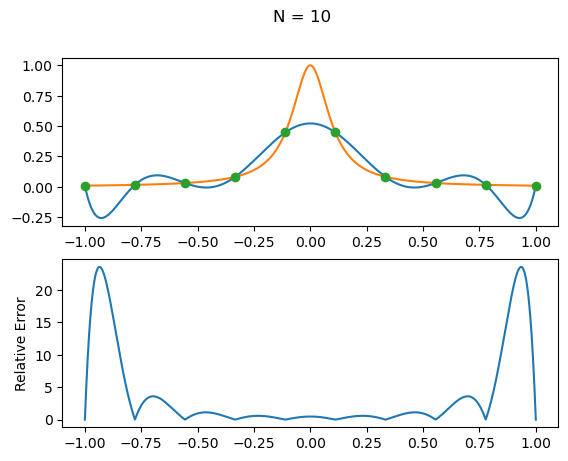

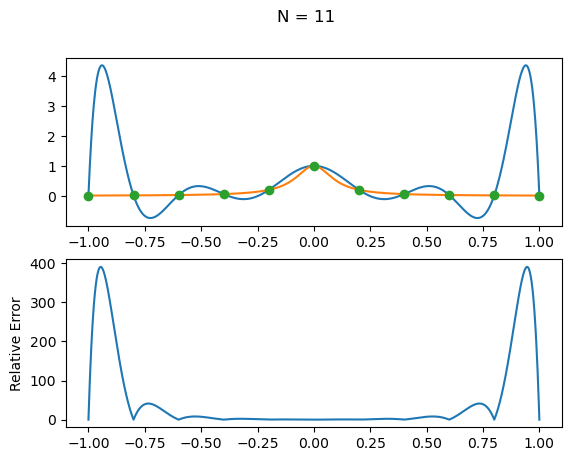

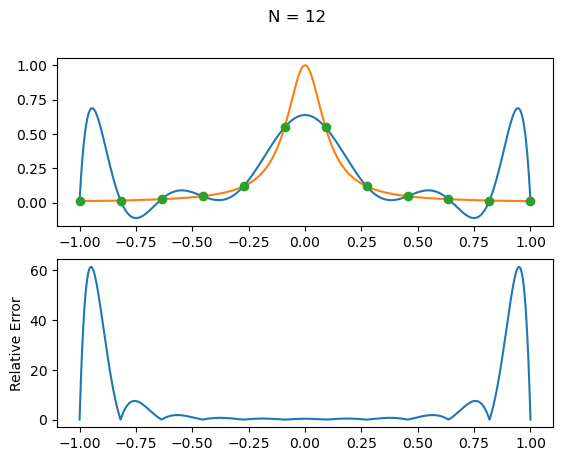

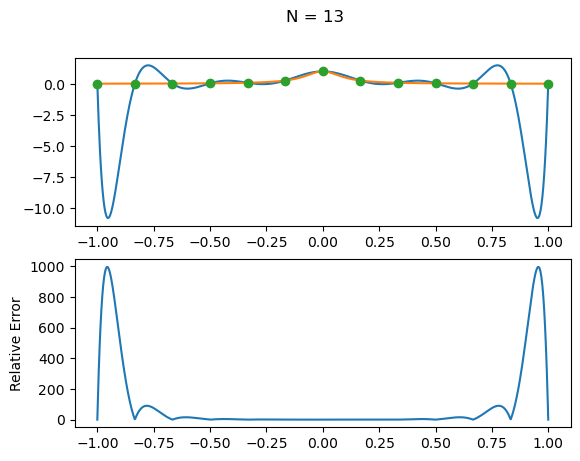

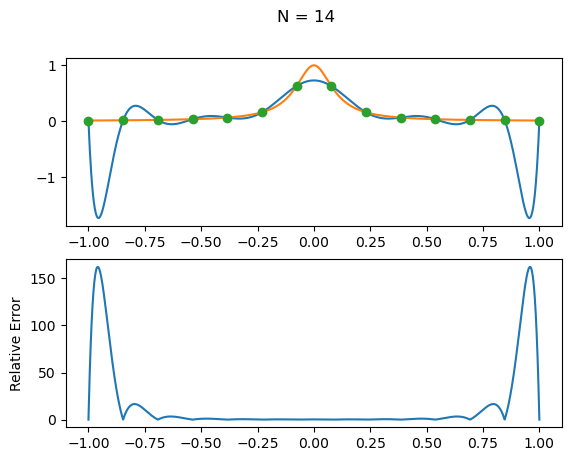

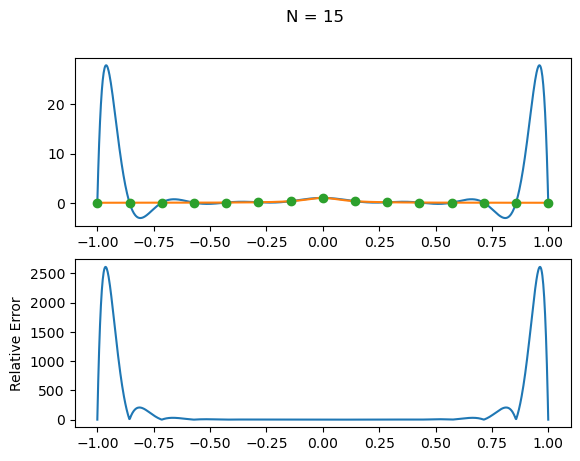

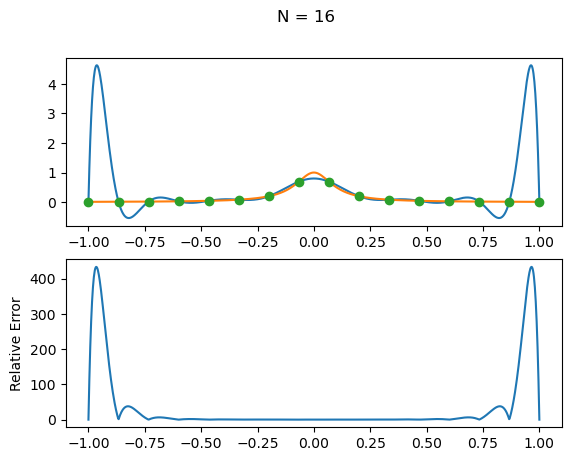

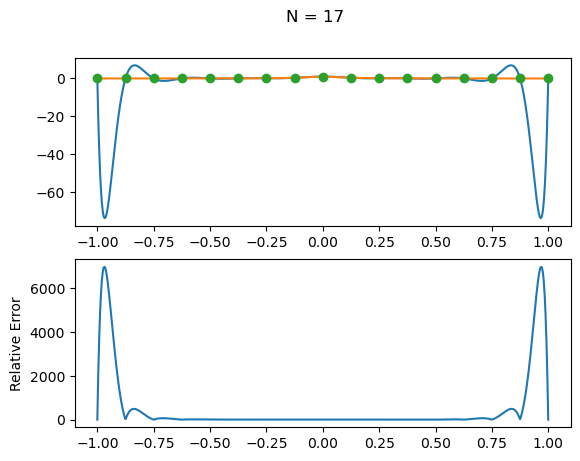

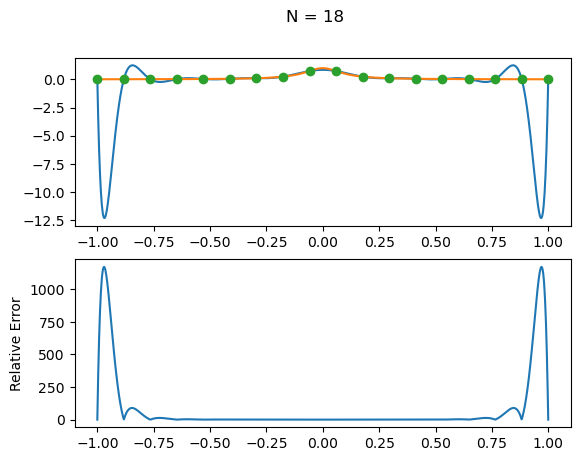

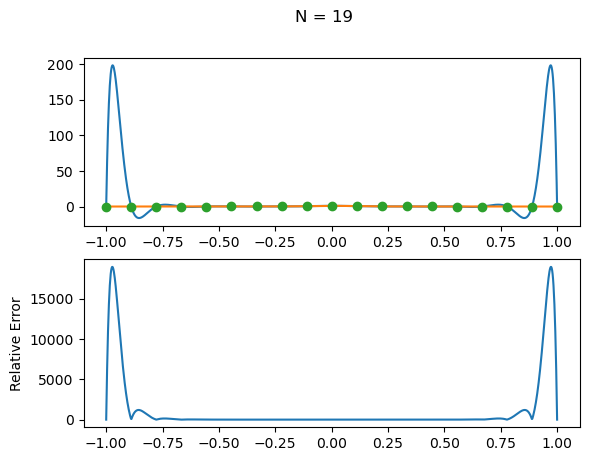

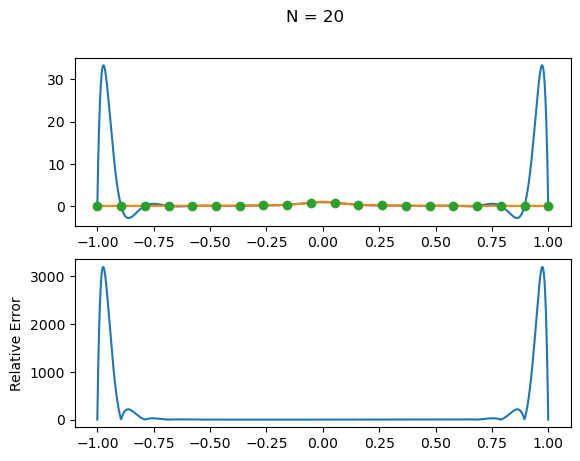

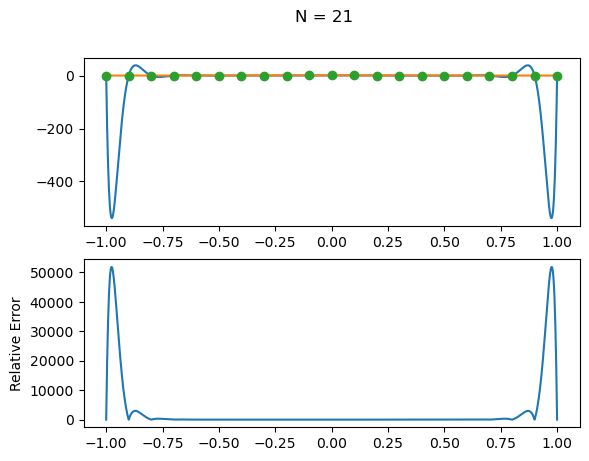

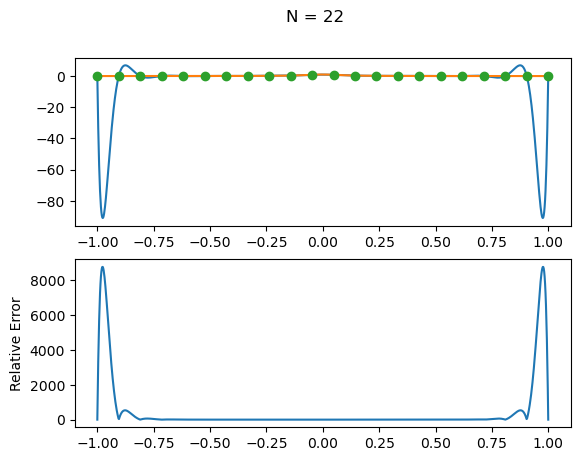

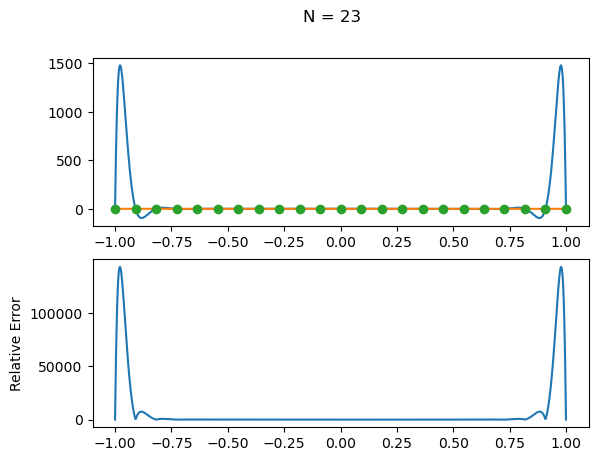

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def getx(N):
    i = np.zeros(N)
    x = np.zeros(N)
    h = 2/(N-1)
    for j in range(N):
        i[j] = j + 1 # Getting it to be 1,2,...
        x[j] = -1 + (i[j]-1)*h
    return x

N = 10
x = getx(N)

# Evaluating f at the nodes
f = lambda x: 1/(1+(10*x)**2)
fx = f(x)

# Finding the vandermonde solution and evaluating at the nodes
def vandermonde_solve(x,y,xq):
    n = len(x)
    v = np.empty((n,n))
    # i = row, j = col
    for i in range(n):
        for j in range(n):
            v[i,j] = x[i]**j
    a = np.linalg.solve(v,y)
    
    p = []
    n = len(a)
    m = len(xq)
    for i in range(m):
        pn = 0
        for j in range(n):
            pn = a[j]*xq[i]**j + pn
        p.append(pn)
    return p

# Plotting 1001 points in the interval of p(x) vs f(X)
xq = np.linspace(-1,1,1001)
p = vandermonde_solve(x,fx,xq)
fxq = f(xq)
plt.plot(xq,p)
plt.plot(xq,fxq)

# Repeating for several different values of N
N = np.arange(5, 24, 1)
for i in range(len(N)):
    x = getx(N[i])
    fx = f(x)
    fxq = f(xq)
    p = vandermonde_solve(x,fx,xq)
    fig, axs = plt.subplots(2)
    fig.suptitle(f"N = {N[i]}")
    axs[0].plot(xq,p)
    axs[0].plot(xq,fxq)
    axs[0].plot(x,fx,'o')
    plt.ylabel("f(x) and p(X)")

    err = np.abs(fxq-p)/np.abs(fxq)
    axs[1].plot(xq,err)
    plt.ylabel("Relative Error")



    

In [42]:
# Barycentric Lagrange
def getPhi(xi,x):
    phi = 1
    for i in range(len(xi)):
        phi = phi * (x - xi[i])
    return phi
    
def getOmega(x):
    omega = np.ones(len(x))
    for j in range(len(x)):
        
        for i in range(len(x)):
            if x[i] != x[j]:
                omega[j] = omega[j]*(x[j]-x[i])
    return omega
    
def barycentric_lagrange(x,y,xq):
    p = np.zeros(len(xq))
    omega = getOmega(x)
    
    for i in range(len(xq)):
        phi = getPhi(x,xq[i])
        sum1 = 0
        for j in range(len(x)):
            sum1 = sum1 + omega/(xq[i] - x[j])*y[j]
           
        p[i] = phi*sum1

    return(p)

# Solving now
N = 10
x = getx(N)
fx = f(x)

xq = np.linspace(-1,1,1001)
p = barycentric_lagrange(x,fx,xq)

    

-0.0


C:\Users\ajpat\AppData\Local\Temp\ipykernel_33064\2226006034.py:25: RuntimeWarning: divide by zero encountered in divide
  sum1 = sum1 + omega/(xq[i] - x[j])*y[j]
C:\Users\ajpat\AppData\Local\Temp\ipykernel_33064\2226006034.py:27: RuntimeWarning: invalid value encountered in multiply
  p[i] = phi*sum1


ValueError: setting an array element with a sequence.